### 4.3.3. The companies that earn the most, in what genres do they invest?
On Kaggle's page, they asked this question and we considered it important to analyze it.

In [10]:
# We convert the json files into a dataframe
dfProduction_companies = utl.getJSONDataFrame(pd, dfMerge, 'production_companies')
dfMainGenres = dfMain.merge(dfGenres, on = 'movie_id')

# We unite both in a single dataframe
df = dfProduction_companies.loc[:,['name','movie_id']]
dfGenresCompanies = pd.merge(df, dfMainGenres, on ='movie_id')

longitud df -->  10332 Contador -->  10332


In the following table we will show the five producers of all the history of cinema with greater profitability. Logically, it will not be necessary to adjust inflation, because profitability is a relative value, in this case between the money invested and the profit obtained.

In [14]:
# We show a table with the five companies that have profited the most from the films produced according to the initial budget.

df = dfGenresCompanies.loc[:,['revenue','budget']]
TableGenresCompanies = dfGenresCompanies.pivot_table(df, index=['name_x']).sort_values("revenue", ascending = False).head(5).round()

Cost_effectiveness = (TableGenresCompanies.revenue / TableGenresCompanies.budget * 100).round(2)

trace0 = go.Table(
  type = 'table',
  header = dict(
    values = ['<b>Companies</b>','<b>Budget</b>', '<b>Revenue</b>','<b> % Cost effectiveness</b>'],
    line = dict(color = 'blue'),
    fill = dict(color = 'lightgrey'),
    align = 'center',
    font = dict(family='Courier New, monospace',color = 'black', size = 16)
  ),
  cells = dict(
    values = [TableGenresCompanies.index[:],TableGenresCompanies.budget, TableGenresCompanies.revenue, Cost_effectiveness],
    line = dict(color = 'blue'),
    fill = dict(color = 'white'),
    align = 'center',
    font = dict(color = 'black', size = 11)
    ))

layout = dict(width=750, height=500)
data = [trace0]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'styled_table')

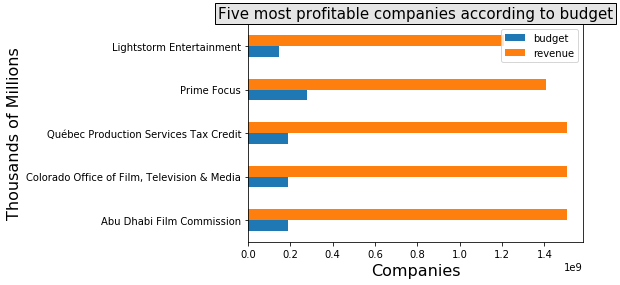

In [12]:
# We reprinted this data in a bar chart.
TableGenresCompanies.plot(kind = 'barh')
plt.title('Five most profitable companies according to budget', fontsize=15, bbox={'facecolor':'1.9', 'pad':3})
plt.xlabel('Companies', fontsize=16)
plt.ylabel("Thousands of Millions", fontsize=16)
plt.show()

The producer that has obtained more profitability from his films is Lightstorm Entertainment, an American company founded by James Camaron in 1990. In which the films Avatar, Titanic and Terminator 2 stand out, like the ones that have won the most box office.

In [18]:
df = dfGenresCompanies[dfGenresCompanies.name_x == 'Lightstorm Entertainment']
df1 = df.groupby(by = ['original_title']).mean()['revenue'].sort_values(ascending = False)

pd.DataFrame(df1)

,revenue
original_title,
Avatar,2787965087
Titanic,1845034188
Terminator 2: Judgment Day,520000000
True Lies,378882411
The Abyss,90000098
